## This notebook will have
- Build a model
- Train a model
- Run a model


In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.5.1+cu121'

## 1. Data Preparing and loading
Use Linerar Regression to make a straight line using known parameters.

In [ ]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [ ]:
print("The value of x",X)
print("The value of y",y)
print("The length of X",len(X))
print("The length of y",len(y))

The value of x tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])
The value of y tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420

In [ ]:
# Creating training and test sets
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [ ]:
from sklearn.model_selection import train_test_split

X_train_skl, X_test_skl, y_train_skl, y_test_skl = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
## Create a function to visualize your data
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  "plots training data, test data and compares predictions"
  plt.figure(figsize=(10, 7))

  #plot the data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="predictions")

  # Show the legedn : show the labels in the graph
  plt.legend(prop={"size": 14})

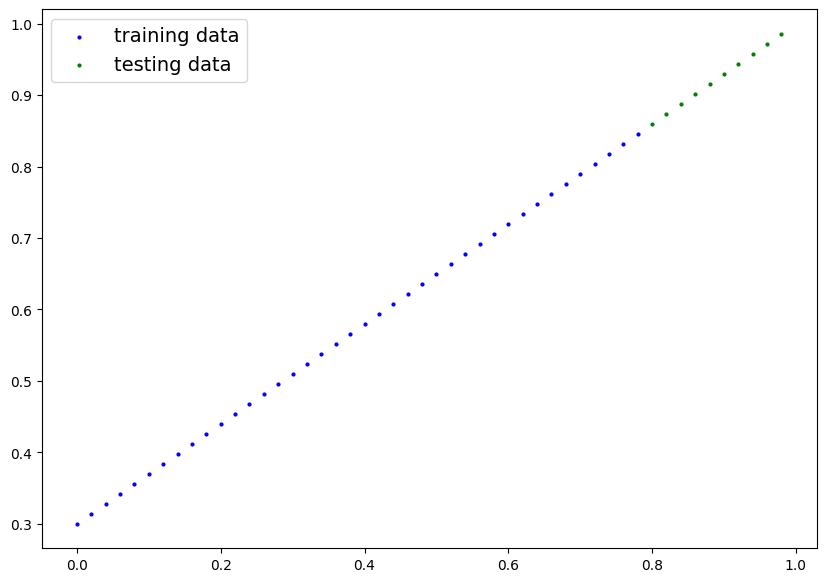

In [ ]:
plot_predictions()

## 2. Build a Model

In [ ]:
from torch import nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights == nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    # Create you own forward method
    def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.weights * x + self.bias


## Update the weight and bias based on training data, adjust the values to better represent ideal values

By using 2 algorithms:
1. Gradient Descent
2. Backward propagation

In [ ]:
h = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                          dtype=torch.float))
print("self.weights ----",h)

self.weights ---- Parameter containing:
tensor([2.1741], requires_grad=True)
